# What is a Transformer?

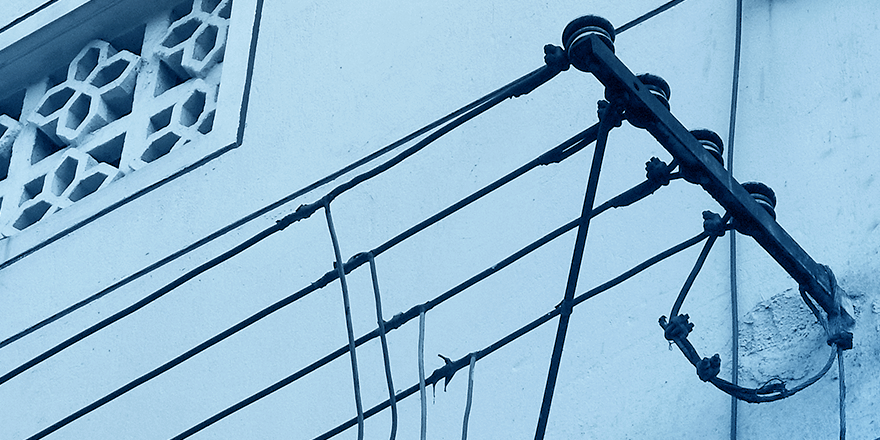

## Вступ до трансформаторів та навчання послідовності в послідовності для машинного навчання

    Нові моделі глибокого навчання впроваджуються зі швидкістю, іноді важко відстежувати всі новинки. Враховуючи це, одна конкретна модель нейронної мережі виявилася особливо ефективною для загальних завдань з обробки природних мов. Модель називається Трансформатором, і вона використовує кілька методів і механізмів, які я тут введу. Документи, на які я посилаюсь у пості, пропонують більш детальний та кількісний опис.
    
## Part 1: Sequence to Sequence Learning and Attention

    У статті "Увага все, що вам потрібно" описані трансформатори та те, що називається архітектурою послідовності послідовностей. Послідовність послідовності (або Seq2Seq) - це нейронна мережа, яка перетворює задану послідовність елементів, наприклад послідовність слів у реченні, в іншу послідовність. (Ну, це, можливо, не здивує вас, враховуючи назву.)
    
    Моделі Seq2Seq особливо хороші в перекладі, де послідовність слів з однієї мови перетворюється на послідовність різних слів іншою мовою. Популярним вибором для цього типу моделей є моделі на основі довготривалої пам’яті (LSTM). За допомогою даних, що залежать від послідовності, модулі LSTM можуть надавати значення послідовності, запам'ятовуючи (або забуваючи) частини, які вона вважає важливими (або неважливими). Наприклад, речення залежать від послідовності, оскільки порядок слів має вирішальне значення для розуміння речення.
    
    LSTM - це природний вибір для цього типу даних.Моделі Seq2Seq складаються з Енкодера та Декодера. Енкодер приймає вхідну послідовність і відображає її у просторі більш високого розміру (n-мірний вектор). Цей абстрактний вектор подається в декодер, який перетворює його у вихідну послідовність. Послідовність виводу може бути іншою мовою, символами, копією введення тощо.
    
    Уявіть Енкодер і Декодер як люди-перекладачі, які можуть говорити лише двома мовами. Їх першою мовою є їх рідна мова, яка відрізняється між ними обома (наприклад, німецькою та французькою) та їх другою мовою, загальною для них. Для перекладу німецької на французьку мову Енкодер перетворює німецьке речення в іншу мову, яку він знає, а саме на уявну. 
    
    Оскільки Декодер вміє читати цю уявну мову, він тепер може перекладати з цієї мови на французьку. Разом модель (що складається з Енкодера та Декодера) може перекласти німецьку на французьку!
    Припустимо, що спочатку ні Енкодер, ні Декодер не дуже добре володіють уявною мовою. 
    Щоб навчитися цьому, ми навчаємо їх (модель) на багатьох прикладах. Дуже основний вибір для Енкодера та Декодера моделі Seq2Seq - це єдиний LSTM для кожного з них.Вам цікаво, коли Трансформер нарешті почне грати, чи не так?
    
    Нам потрібна ще одна технічна деталь, щоб полегшити розуміння трансформаторів: Увага. Механізм уваги розглядає послідовність введення та на кожному кроці визначає, які інші частини послідовності є важливими. Це звучить абстрактно, але дозвольте уточнити на прикладі легкого прикладу: Читаючи цей текст, ви завжди зосереджуєтесь на прочитаному слові, але в той же час ваш розум все ще зберігає важливі ключові слова тексту в пам’яті, щоб забезпечити контекст.
    
    Механізм уваги працює аналогічно для певної послідовності. Для нашого прикладу з людським Енкодером та Декодером уявіть, що замість того, щоб записувати лише переклад речення уявною мовою, Енкодер також записує ключові слова, важливі для семантики речення, і дає їх Декодеру в крім регулярного перекладу. 
    Ці нові ключові слова значно спрощують переклад декодера, оскільки він знає, які частини речення є важливими та які ключові терміни надають контексту речення.Іншими словами, для кожного вводу, який читає LSTM (Енкодер), механізм уваги враховує одночасно декілька інших входів і визначає, які з них важливі, привласнюючи різні ваги цим входам. Потім Декодер прийме як вхід закодоване речення та ваги, передбачені механізмом уваги. 
    
    Щоб дізнатися більше про увагу, дивіться цю статтю. А для більш наукового підходу, ніж запропонований, читайте про різні підходи, орієнтовані на увагу моделей послідовності в послідовності, у цій великій статті під назвою «Ефективні підходи до перекладу нейронної машини на основі уваги».

# Part 2: The Transformer

    У статті "Увага все, що вам потрібно" представлена ​​нова архітектура під назвою "Трансформер". Як вказує заголовок, він використовує механізм уваги, який ми бачили раніше. Як і LSTM, Transformer - це архітектура для перетворення однієї послідовності в іншу за допомогою двох частин (Encoder і Decoder), але вона відрізняється від описаних раніше / існуючих моделей послідовності послідовностей тим, що не передбачає жодних рекурентних мереж ( ГРУ, ЛСТМ тощо).
    
    Поточні мережі до цих пір були одним з найкращих способів зафіксувати своєчасні залежності в послідовностях. Однак команда, яка презентувала цей документ, показала, що архітектура, що має лише механізми уваги, без будь-яких RNN (Recurrent Neural Networks), може покращити результати перекладацького завдання та інші завдання! Одне вдосконалення задач з природничої мови представлено командою, яка представляє BERT: BERT: попередня підготовка глибоких двонаправлених трансформаторів для розуміння мови.
    
    Отже, що саме таке Трансформатор?
    Зображення коштує тисячі слів, тому ми почнемо з цього!
    
   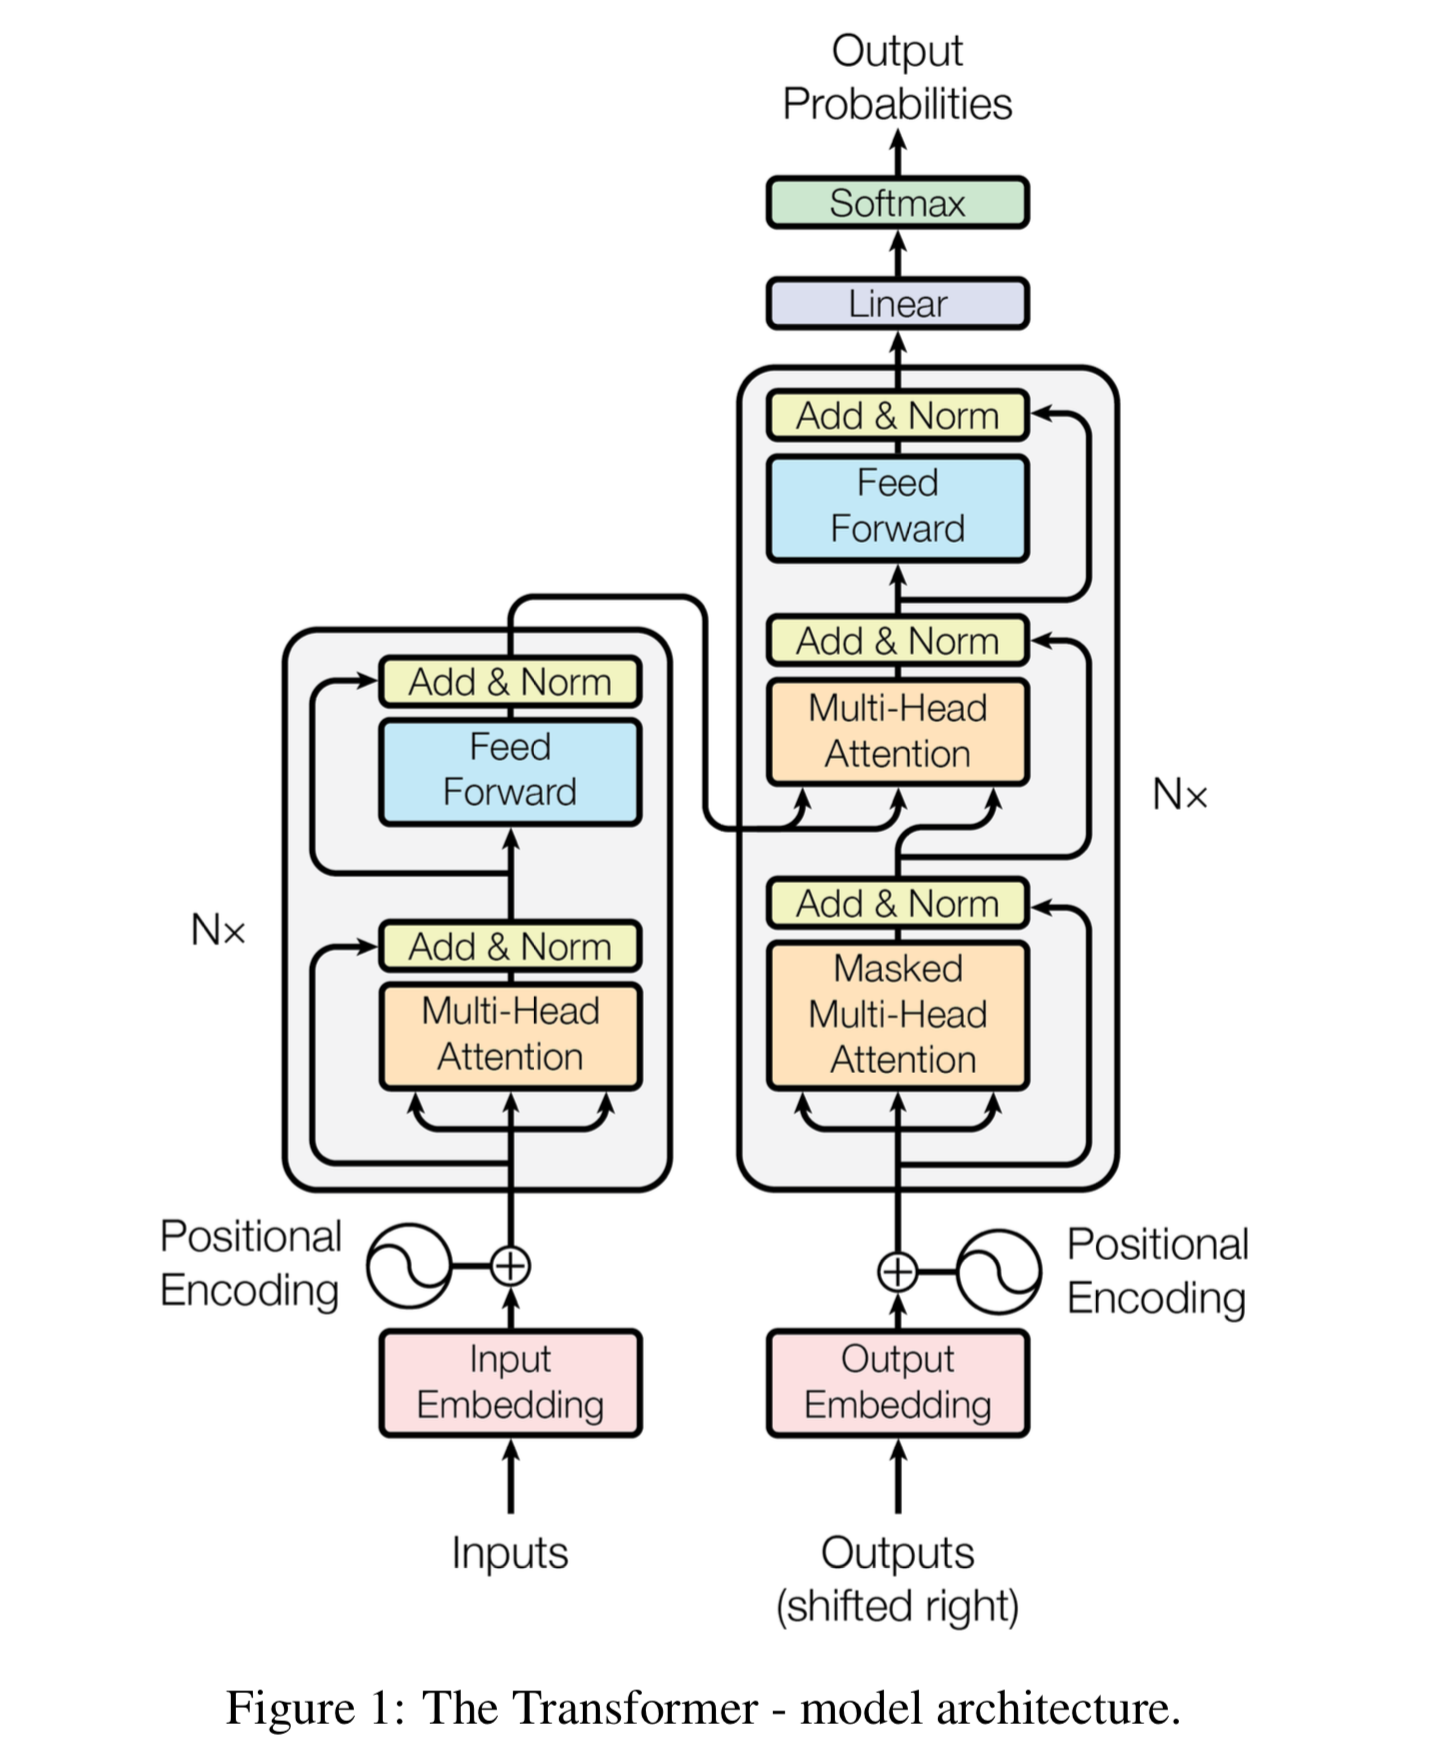
   
    Кодер знаходиться зліва, а Декодер - праворуч. І Енкодер, і Декодер складаються з модулів, які можна складати один на одного кілька разів, що описано Nx на малюнку. Ми бачимо, що модулі складаються в основному з шарів Multi-Head Увага та подання вперед. Входи та виходи (цільові пропозиції) спочатку вбудовуються в n-мірний простір, оскільки ми не можемо безпосередньо використовувати рядки.Однією незначною, але важливою частиною моделі є кодування позицій різних слів. 
    
    Оскільки у нас немає періодичних мереж, які можуть запам'ятати, як послідовності подаються в модель, нам потрібно якось надати кожному слову / частині в нашій послідовності відносну позицію, оскільки послідовність залежить від порядку її елементів. Ці позиції додаються до вбудованого подання (n-мірного вектора) кожного слова.
    
    Давайте детальніше розглянемо ці цеглинки із увагою на багато головок у моделі:

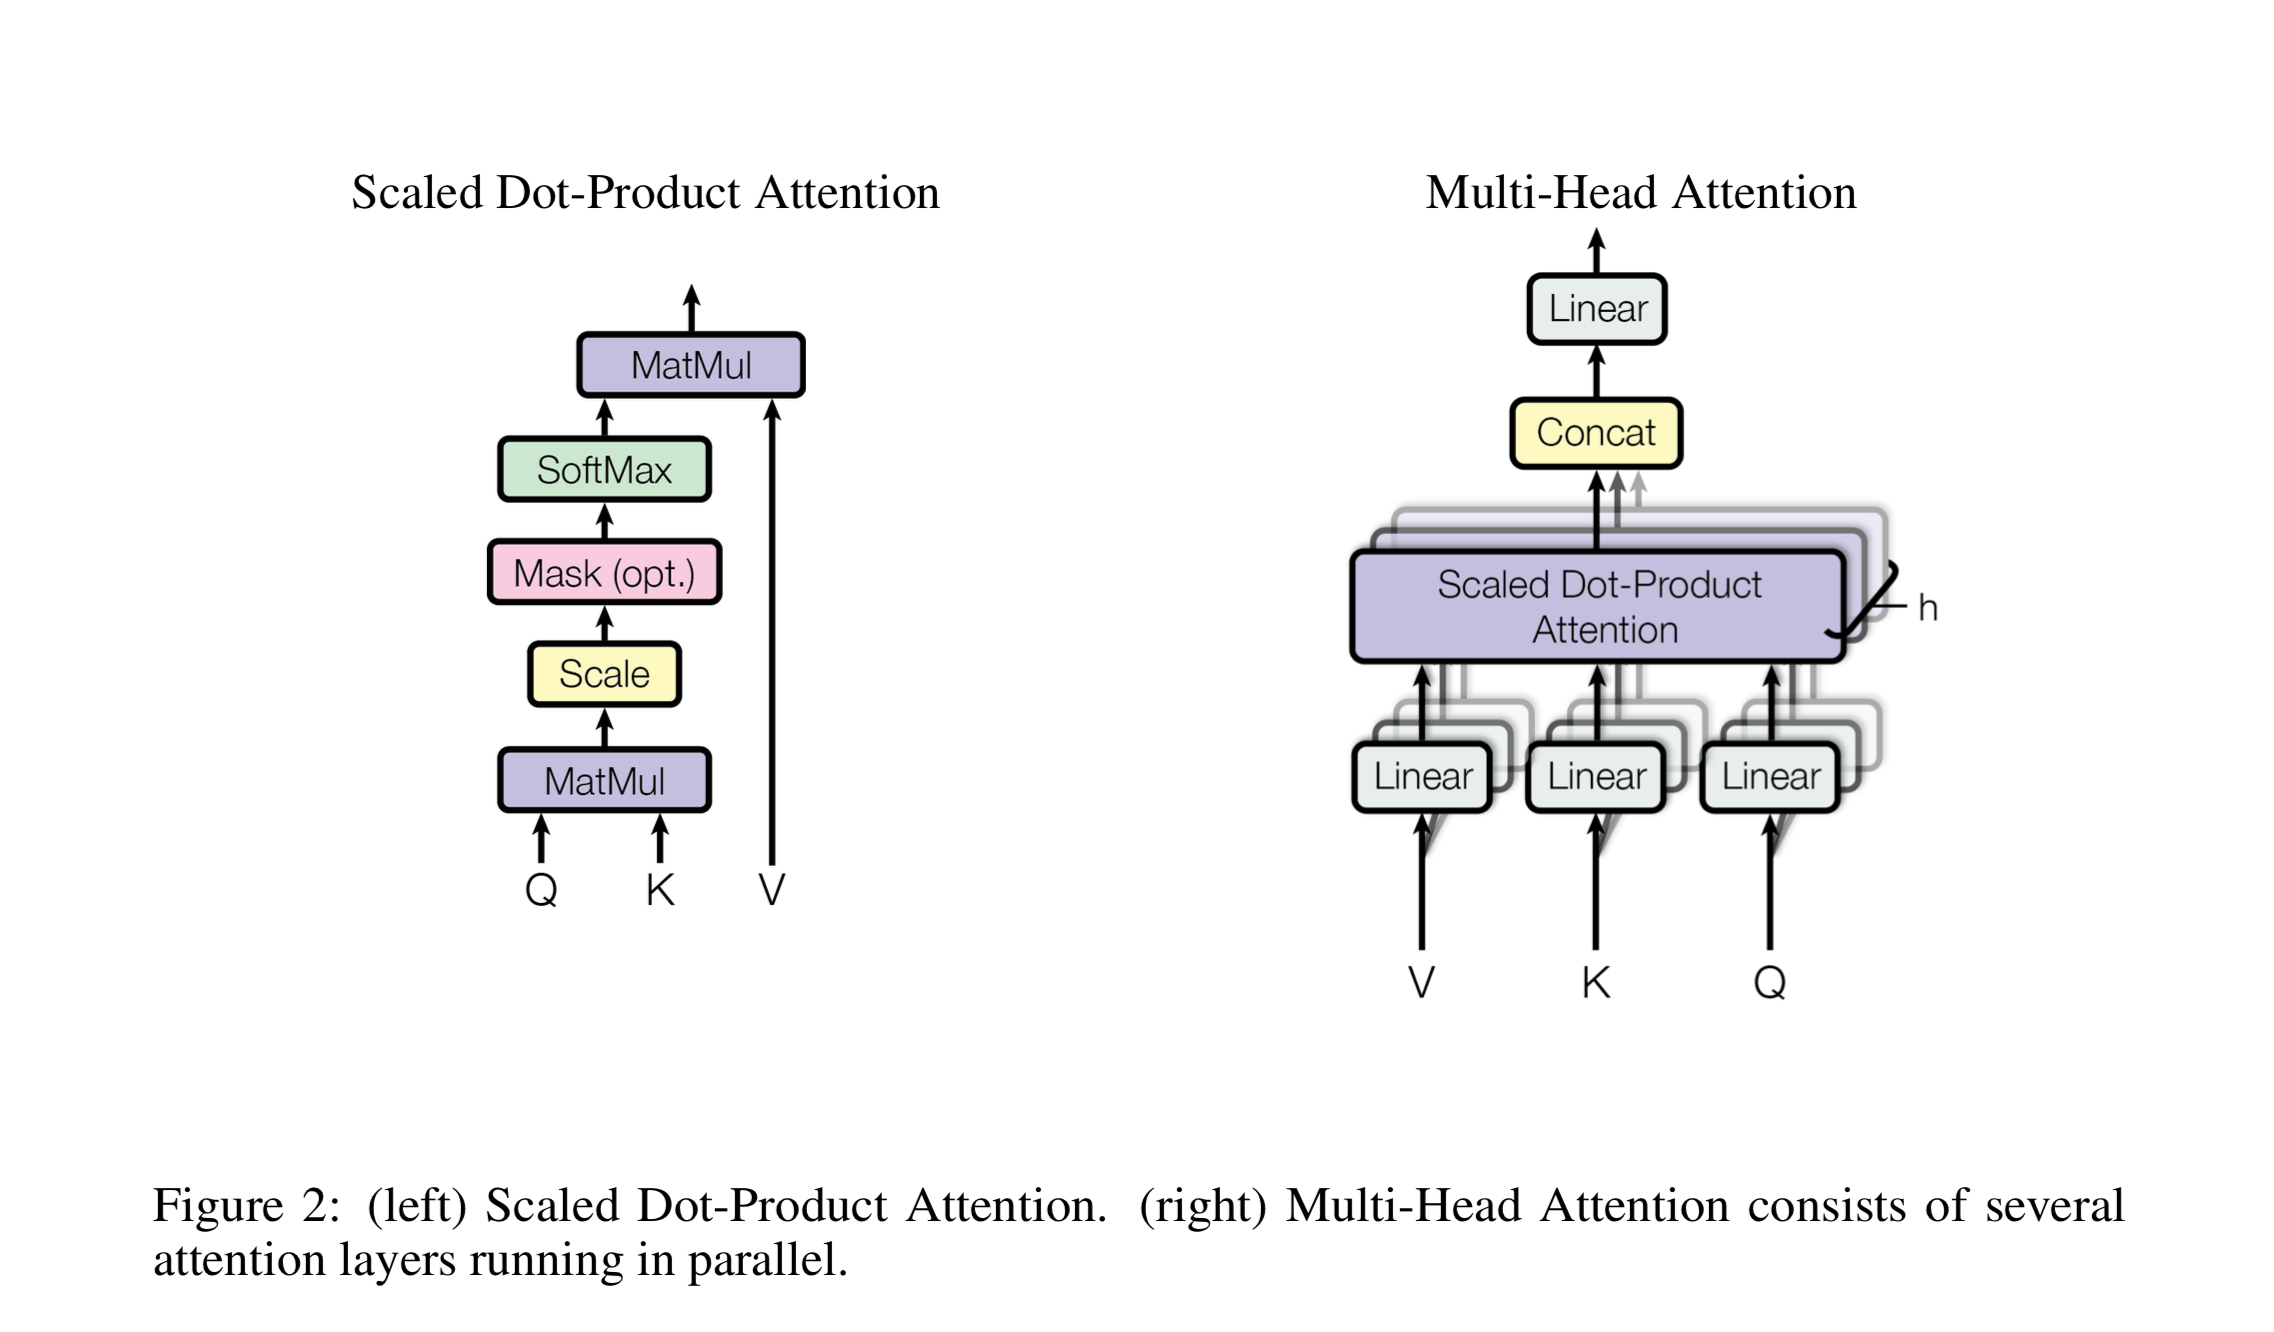

    Почнемо з лівого опису механізму уваги. Це не дуже складно і може бути описане наступним рівнянням:

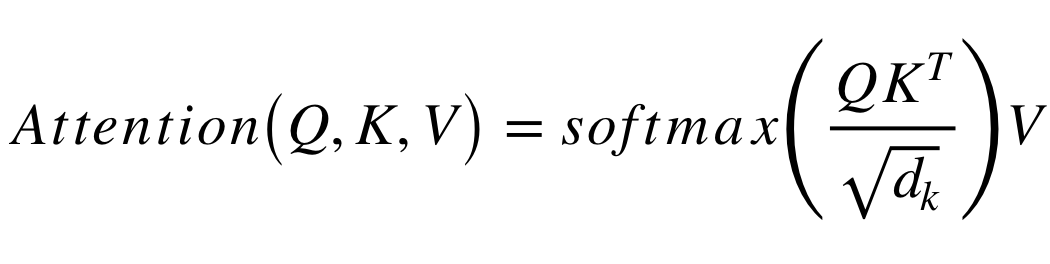

    Q - матриця, яка містить запит (векторне представлення одного слова в послідовності), K - всі ключі (векторні подання всіх слів у послідовності) і V - значення, які знову є векторними поданнями всіх слова в послідовності. Для кодера і декодера, багатоголових модулів уваги, V складається з тієї ж послідовності слів, що й Q. Однак для модуля уваги, який враховує кодер і послідовності декодера, V відрізняється від послідовності, представленої Q.
    Щоб трохи спростити це, ми могли б сказати, що значення V помножуються та підсумовуються з деякими вагами a, де наші ваги визначаються:

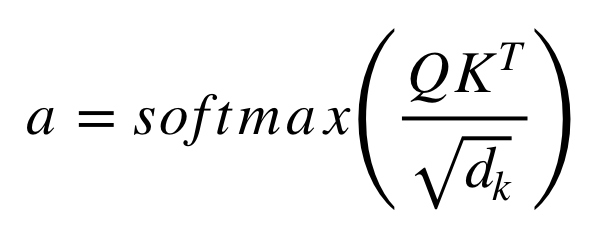

    Це означає, що ваги a визначаються тим, як на кожне слово послідовності (представлене Q) впливають усі інші слова в послідовності (представлені K). Крім того, функція SoftMax застосовується до ваг a для розподілу між 0 і 1. Ці ваги потім застосовуються до всіх слів у послідовності, що вводяться в V (ті ж вектори, що і Q для кодера та декодера, але різні для модуль, який має входи кодера і декодера).
    
    На малюнку праворуч описано, як цей механізм уваги можна паралелізувати на кілька механізмів, які можна використовувати поруч. Механізм уваги повторюється багаторазово з лінійними проекціями Q, K і V. Це дозволяє системі вчитися з різних уявлень Q, K і V, що вигідно моделі. Ці лінійні подання виконують шляхом множення Q, K і V на вагові матриці W, які вивчаються під час тренінгу.
    
    Ці матриці Q, K і V відрізняються для кожного положення модулів уваги в структурі залежно від того, чи перебувають вони в кодері, декодері або між датчиком і декодером. Причина полягає в тому, що ми хочемо брати участь або в цілій послідовності введення кодера, або в частині послідовності введення декодера. Багатоголовий модуль уваги, який з'єднує кодер і декодер, забезпечить врахування послідовності введення кодера разом з вхідною послідовністю декодера до заданої позиції.Після головок з багато увагою і в кодері, і в декодері, ми маємо точковий подаючий шар. Ця маленька мережа передачі даних має однакові параметри для кожної позиції, які можна описати як окреме, однакове лінійне перетворення кожного елемента із заданої послідовності.
    
### Training

    Як тренувати такого «звіра»? Навчання та висновок про моделі Seq2Seq трохи відрізняється від звичайної проблеми класифікації. Те саме стосується трансформаторів.Ми знаємо, що для підготовки моделі для перекладацьких завдань нам потрібні два речення на різних мовах, які є перекладами один одного. Як тільки у нас буде багато пар речень, ми можемо розпочати навчання нашої моделі.Скажімо, ми хочемо перекласти французьку на німецьку. Нашим кодованим входом буде французьке речення, а введенням для декодера буде німецьке речення. Однак вхід декодера буде зміщений праворуч на одне положення. ..Чакай, чому?
        
    Однією з причин є те, що ми не хочемо, щоб наша модель навчилася копіювати свій вклад декодера під час тренування, але ми хочемо дізнатися, що з огляду на послідовність кодера та певну послідовність декодера, яку вже бачила модель, ми прогнозуємо наступне слово / символ.Якщо ми не змістимо послідовність декодера, модель навчиться просто «копіювати» введення декодера, оскільки цільовим словом / символом для позиції i буде слово / символ i вхід декодера. Таким чином, зміщуючи введення декодера на одну позицію, нашій моделі потрібно передбачити цільове слово / символ для позиції, що бачив лише слово / символи 1,…, i-1 у послідовності декодера.
    
    Це заважає нашій моделі вивчити завдання копіювання / вставки. Ми заповнюємо першу позицію вводу декодера маркером початку пропозиції, оскільки це місце було б порожнім через зсув правої частини.

    Аналогічно, ми додаємо маркер кінця речення до вхідної послідовності декодера, щоб позначити кінець цієї послідовності, і він також додається до цільового вихідного пропозиції. Через мить ми побачимо, наскільки це корисно для отримання результатів.Це справедливо для моделей Seq2Seq і для Трансформатора. 
    На додаток до зсуву вправо, Трансформатор застосовує маску до входу в перший багатоголовий модуль уваги, щоб уникнути появи потенційних елементів послідовності в майбутньому. 
    
    Це характерно для архітектури Трансформатора, оскільки у нас немає RNN, куди ми могли б вводити послідовність послідовно. Тут ми вводимо все разом, і якби не було маски, багатоголова увага розглядала б всю послідовність введення декодера в кожній позиції.
    
    Процес подачі правильного зміщеного вводу в декодер також називається вчителем-форсуванням, як описано в цьому блозі.Цільова послідовність, яку ми хочемо для наших розрахунків втрат, - це просто введення декодера (німецьке речення) без його зміщення та з лексемою кінця послідовності в кінці.
    
### Inference

    

Посилання на ці моделі відрізняються від навчальних, що має сенс, оскільки врешті-решт ми хочемо перекласти французьке речення, не маючи речення з німецької мови. Хитрість тут полягає в повторному подачі нашої моделі для кожної позиції вихідної послідовності, поки ми не зустрінемо маркер кінця речення.

Більш покроковий метод буде:
    1. Вводимо повну послідовність кодера (французьке речення) і як введення декодера ми приймаємо порожню послідовність із лише маркером початку речення на першій позиції. Це виведе послідовність, де ми візьмемо лише перший елемент.
    2. Цей елемент буде заповнений у другій позиції нашої послідовності введення декодера, яка тепер містить ознаку початку речення та перше слово / символ у ньому.
    3. Введіть як модель послідовності кодера, так і нову послідовність декодера. Візьміть другий елемент виводу і помістіть його в послідовність введення декодера.
    4. Повторіть це, поки не передбачите маркер кінця речення, який позначає кінець перекладу.
    
Ми бачимо, що для перекладу речення нам потрібні кілька пробігів через нашу модель.

Я сподіваюся, що ці описи зробили архітектуру Трансформатора трохи зрозумілішою для всіх, починаючи з структур Seq2Seq та кодера-декодера.

# Part 3: Use-Case ‘Transformer for Time-Series’

Ми бачили архітектуру Трансформатора, і з літератури ми знаємо, що автори "Увага - все, що вам потрібно", що модель дуже добре справляється з мовними завданнями. Тепер перевіримо Трансформатор у випадку використання.
Замість завдання з перекладу реалізуємо прогноз часового ряду щодо погодинного потоку електроенергії в Техасі, наданий Радою електричної надійності Техасу (ERCOT). Погодинні дані ви можете знайти тут.
Велике детальне пояснення Трансформатора та його реалізації надає harvardnlp. Якщо ви хочете заглибитися в архітектуру, рекомендую пройти цю реалізацію.

Оскільки ми можемо використовувати послідовно-послідовну модель на основі LSTM для складання багатокрокових прогнозів прогнозування, давайте подивимось на Трансформатор та його потужність, щоб зробити ці прогнози. Однак спочатку потрібно внести кілька змін в архітектуру, оскільки ми працюємо не з послідовностями слів, а зі значеннями. Крім того, ми робимо автоматичну регресію, а не класифікацію слів / символів.

# Summary

Результати показують, що можна було б використовувати архітектуру Трансформатора для прогнозування часових рядів.
Однак під час оцінки це показує, що чим більше кроків ми хочемо прогнозувати, тим вища помилка стане. 

Перший графік (рис. 3) був досягнутий, використовуючи 24 години для прогнозування наступних 12 годин. Якщо ми прогнозуємо лише одну годину, результати набагато кращі, як ми бачимо на другій графіку (рис. 4).

Існує багато місця для розібрання з параметрами Трансформатора, такими як кількість шарів декодера та кодера тощо. Це не було ідеальною моделлю, а при кращій налаштуванні та навчанні результати, ймовірно, покращаться.

Це може стати великою допомогою для прискорення навчання за допомогою графічних процесорів. Я використовував локальну платформу Watson Studio для навчання своєї моделі з графічними процесорами, і я дозволяв їй працювати там, а не на своїй локальній машині. Ви також можете прискорити навчання за допомогою графічних процесорів Watson's Machine Learning, які є безкоштовними до певного часу навчання!

Перегляньте мій попередній блог, щоб побачити, як це можна легко інтегрувати у ваш код.Дуже дякую, що прочитали це, і я сподіваюся, що мені вдалося прояснити кілька понять людям, які тільки починають глибоко навчатися!